# Первичное исследование данных (Data Understanding)

Цель: Загрузить данные, понять их структуру, типы признаков, провести базовую статистику и аудит качества.
Датасет: Bank Marketing (результаты телефонных маркетинговых кампаний португальского банка).
Целевая переменная: y (оформил ли клиент депозит: "yes", "no").

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Путь к файлу (убедитесь, что файл лежит в папке data относительно ноутбука или поправьте путь)
file_path = 'bank-additional-full.csv'

# Загрузка данных (разделитель - точка с запятой)
try:
    df = pd.read_csv(file_path, sep=';')
    print("Данные успешно загружены!")
except FileNotFoundError:
    print("Файл не найден. Проверьте путь.")

Данные успешно загружены!


## 1. Первичный обзор данных
Посмотрим на первые строки, размеры датасета и типы данных.

In [13]:
# Размер датасета
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

# Первые 5 строк
display(df.head())

# Информация о типах данных
print("\nИнформация о данных:")
df.info()

Количество строк: 41188
Количество столбцов: 21


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

## 2. Базовая статистика
Посмотрим на распределение числовых и категориальных признаков.

In [14]:
# Статистика для числовых признаков
print("Статистика числовых признаков:")
display(df.describe())

# Статистика для категориальных признаков (object)
print("\nСтатистика категориальных признаков:")
display(df.describe(include=['object']))

Статистика числовых признаков:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



Статистика категориальных признаков:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## 3. Аудит качества данных

### 3.1 Поиск дубликатов
Проверим наличие полностью совпадающих строк.

In [15]:
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates}")

if duplicates > 0:
    print("Примеры дубликатов:")
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(4))

Количество полных дубликатов: 12
Примеры дубликатов:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


### 3.2 Поиск пропусков (Explicit & Implicit)
Проверим явные пропуски (NaN) и неявные (например, значения "unknown").

In [16]:
# Явные пропуски
print("Явные пропуски (NaN):")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Неявные пропуски (значение 'unknown')
# Подсчитаем, в каких колонках встречается 'unknown'
unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
print("\nЗначения 'unknown' (неявные пропуски):")
print(unknown_counts[unknown_counts > 0])

Явные пропуски (NaN):
Series([], dtype: int64)

Значения 'unknown' (неявные пропуски):
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


### 3.3 Аномалии и спецзначения
В описании датасета сказано, что значение 999 в колонке pdays означает, что с клиентом ранее не связывались. Это не реальное числовое значение дней, а метка.

In [17]:
print(f"Количество значений 999 в 'pdays': {(df['pdays'] == 999).sum()}")
print(f"Процент 'новых' клиентов: {(df['pdays'] == 999).mean()*100:.2f}%")

Количество значений 999 в 'pdays': 39673
Процент 'новых' клиентов: 96.32%


## 4. Визуализация данных (EDA)

### 4.1 Целевая переменная
Посмотрим на баланс классов.

/tmp/ipython-input-3251942015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='viridis')


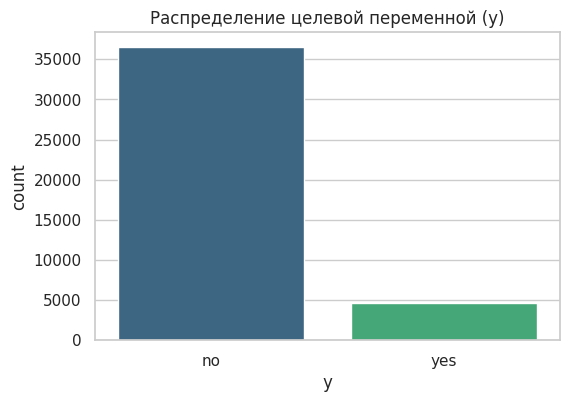

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Распределение целевой переменной (y)')
plt.show()

### 4.2 Числовые признаки
Построим гистограммы для age и duration, а также боксплот для поиска выбросов.

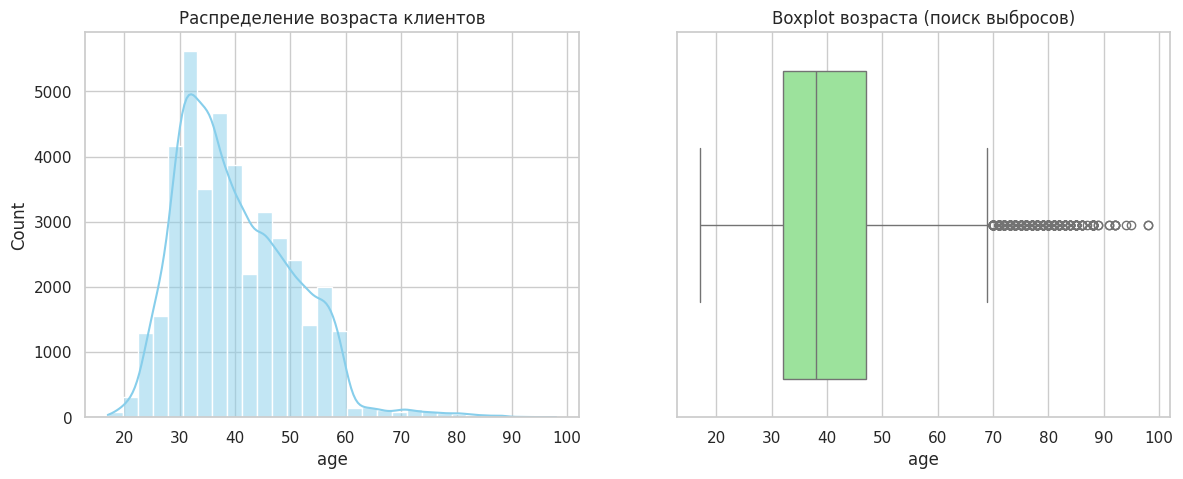

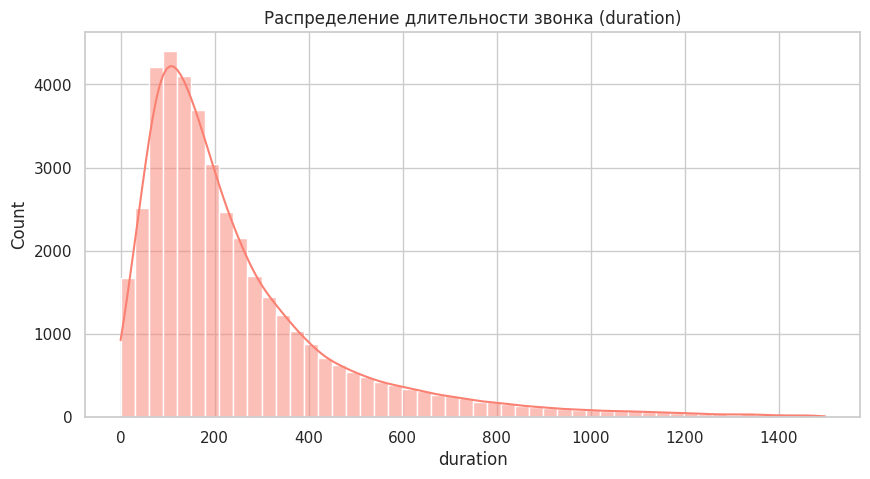

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Распределение возраста
sns.histplot(df['age'], bins=30, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Распределение возраста клиентов')

# Боксплот возраста
sns.boxplot(x=df['age'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot возраста (поиск выбросов)')

plt.show()

# Распределение длительности звонка
plt.figure(figsize=(10, 5))
sns.histplot(df[df['duration'] < 1500]['duration'], bins=50, kde=True, color='salmon') # Ограничим для наглядности
plt.title('Распределение длительности звонка (duration)')
plt.show()

### 4.3 Категориальные признаки
Посмотрим на распределение профессий (job) и семейного положения (marital).

/tmp/ipython-input-4004826176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, order = df['job'].value_counts().index, palette='muted')


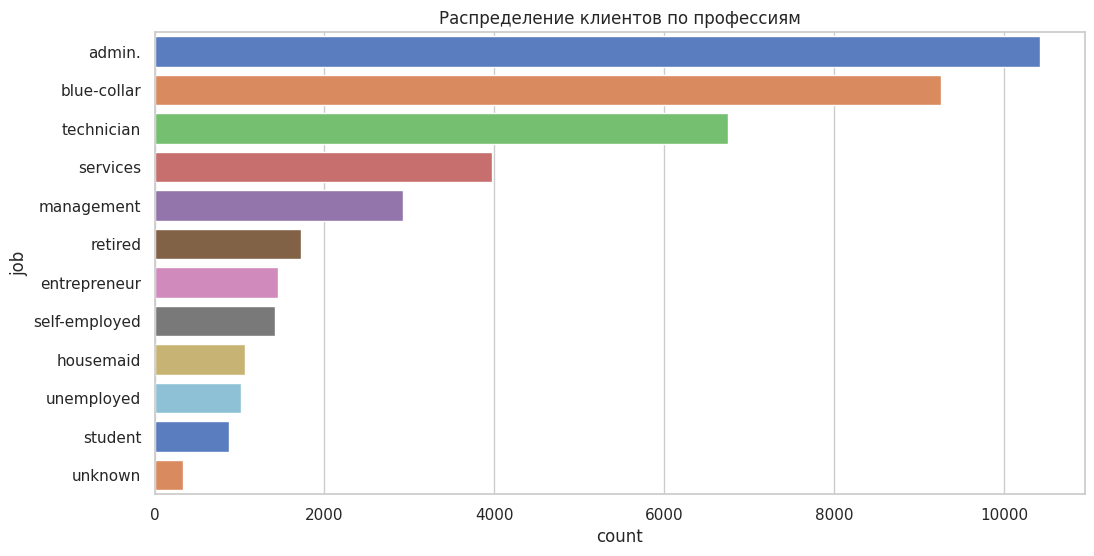

/tmp/ipython-input-4004826176.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=df, palette='pastel')


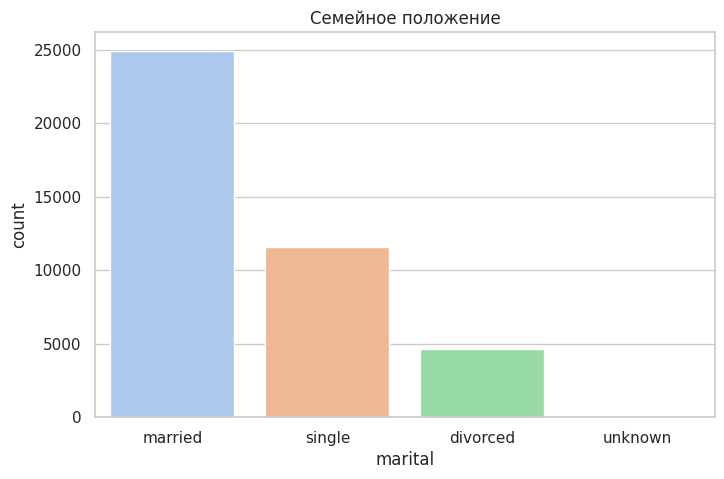

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=df, order = df['job'].value_counts().index, palette='muted')
plt.title('Распределение клиентов по профессиям')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='marital', data=df, palette='pastel')
plt.title('Семейное положение')
plt.show()